In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import plotting

#plotly
#import plotly.offline as py
#import plotly.graph_objects as go
#from plotly.offline import init_notebook_mode, iplot
#from plotly import tools
#init_notebook_mode(connected=True)
#import plotly.figure_factory as ff
#import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix,classification_report,precision_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf
sns.set(style="whitegrid")

plt.style.use('fivethirtyeight')

import warnings

In [3]:
df=pd.read_csv('/content/drive/Shareddrives/IFSC/IML/P5. Classificação/genderClass.csv')

In [6]:
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [5]:
df['Favorite Color'].value_counts()

,count
Favorite Color,
Cool,37
Warm,22
Neutral,7


In [ ]:
df['Favorite Music Genre'].value_counts()

Favorite Music Genre
Rock                19
Pop                 17
Hip hop              8
Electronic           8
R&B and soul         6
Folk/Traditional     4
Jazz/Blues           4
Name: count, dtype: int64

In [ ]:
df['Favorite Beverage'].value_counts()

Favorite Beverage
Doesn't drink    14
Beer             13
Other            11
Wine             10
Vodka             9
Whiskey           9
Name: count, dtype: int64

In [ ]:
df['Favorite Soft Drink'].value_counts()

Favorite Soft Drink
Coca Cola/Pepsi    32
Fanta              14
7UP/Sprite         13
Other               7
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

Class 0: 33
Class 1: 33
Proportion: 1.0 : 1


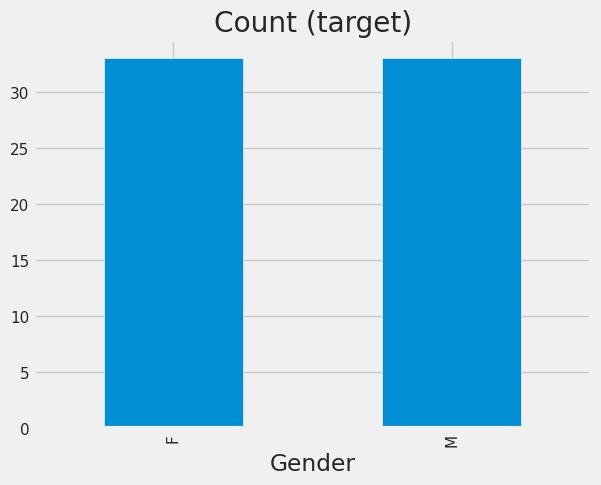

In [ ]:
target_count = df['Gender'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [7]:
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Gender']=label_encoder.fit_transform(df['Gender'])
df


,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,0
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,0
2,Warm,Rock,Wine,Coca Cola/Pepsi,0
3,Warm,Folk/Traditional,Whiskey,Fanta,0
4,Cool,Rock,Vodka,Coca Cola/Pepsi,0
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,1
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,1
63,Neutral,Hip hop,Doesn't drink,Fanta,1
64,Cool,Rock,Wine,Coca Cola/Pepsi,1


In [ ]:
df.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [ ]:
df['Favorite Color'] = label_encoder.fit_transform(df['Favorite Color'])
df['Favorite Music Genre'] = label_encoder.fit_transform(df['Favorite Music Genre'])
df['Favorite Beverage'] = label_encoder.fit_transform(df['Favorite Beverage'])
df['Favorite Soft Drink'] = label_encoder.fit_transform(df['Favorite Soft Drink'])

In [10]:
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,0
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,0
2,Warm,Rock,Wine,Coca Cola/Pepsi,0
3,Warm,Folk/Traditional,Whiskey,Fanta,0
4,Cool,Rock,Vodka,Coca Cola/Pepsi,0
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,1
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,1
63,Neutral,Hip hop,Doesn't drink,Fanta,1
64,Cool,Rock,Wine,Coca Cola/Pepsi,1


In [11]:
year_feature=pd.get_dummies(df, columns=['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage','Favorite Soft Drink'])
year_feature.head()

,Gender,Favorite Color_Cool,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre_Electronic,Favorite Music Genre_Folk/Traditional,Favorite Music Genre_Hip hop,Favorite Music Genre_Jazz/Blues,Favorite Music Genre_Pop,Favorite Music Genre_R&B and soul,...,Favorite Beverage_Beer,Favorite Beverage_Doesn't drink,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink_7UP/Sprite,Favorite Soft Drink_Coca Cola/Pepsi,Favorite Soft Drink_Fanta,Favorite Soft Drink_Other
0,0,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,0,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
3,0,False,False,True,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [ ]:
year_feature.columns

Index(['Gender', 'Favorite Color_0', 'Favorite Color_1', 'Favorite Color_2',
       'Favorite Music Genre_0', 'Favorite Music Genre_1',
       'Favorite Music Genre_2', 'Favorite Music Genre_3',
       'Favorite Music Genre_4', 'Favorite Music Genre_5',
       'Favorite Music Genre_6', 'Favorite Beverage_0', 'Favorite Beverage_1',
       'Favorite Beverage_2', 'Favorite Beverage_3', 'Favorite Beverage_4',
       'Favorite Beverage_5', 'Favorite Soft Drink_0', 'Favorite Soft Drink_1',
       'Favorite Soft Drink_2', 'Favorite Soft Drink_3'],
      dtype='object')

In [12]:
X=year_feature.drop('Gender', axis=1)
y=year_feature['Gender']
#X=df.drop('Gender', axis=1)
#y=df['Gender']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [13]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=10)


In [14]:
X_train

,Favorite Color_Cool,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre_Electronic,Favorite Music Genre_Folk/Traditional,Favorite Music Genre_Hip hop,Favorite Music Genre_Jazz/Blues,Favorite Music Genre_Pop,Favorite Music Genre_R&B and soul,Favorite Music Genre_Rock,Favorite Beverage_Beer,Favorite Beverage_Doesn't drink,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink_7UP/Sprite,Favorite Soft Drink_Coca Cola/Pepsi,Favorite Soft Drink_Fanta,Favorite Soft Drink_Other
53,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False
10,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False
46,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False
44,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
35,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
18,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False
4,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False
31,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False
1,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False
12,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False


In [ ]:
X_test.shape

(20, 20)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#model_lr=LogisticRegression()
#model_lr.fit(X, y)
#model_rf=RandomForestClassifier()
#model_rf.fit(X_train, y_train)
model_rna=MLPClassifier(hidden_layer_sizes=(100,100),solver='lbfgs', verbose=True, max_iter=500)
model_rna.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500, solver='lbfgs',
              verbose=True)

In [ ]:
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

In [ ]:
y_pred_train = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)

In [16]:
y_pred_train = model_rna.predict(X_train)
y_pred_test = model_rna.predict(X_test)

In [18]:
from sklearn import metrics

In [19]:
print("Accuracy Score Train:", metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy Score Test:", metrics.accuracy_score(y_test, y_pred_test))
print()
print("F1 Score:", metrics.f1_score(y_test, y_pred_test))
#print("Precision Score:", metrics.precision_score(y_test, y_pred_test))
#print("ROC-AUC Score:", metrics.roc_auc_score(y_test, y_pred_test))

Accuracy Score Train: 0.9347826086956522
Accuracy Score Test: 0.75

F1 Score: 0.7058823529411765


In [ ]:
print("Accuracy Score Train:", metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy Score Test:", metrics.accuracy_score(y_test, y_pred_test))
print()
print("F1 Score:", metrics.f1_score(y_test, y_pred_test))
#print("Precision Score:", metrics.precision_score(y_test, y_pred_test))
#print("ROC-AUC Score:", metrics.roc_auc_score(y_test, y_pred_test))

Accuracy Score Train: 0.9347826086956522
Accuracy Score Test: 0.65

F1 Score: 0.6666666666666666


In [ ]:
print("Accuracy Score Train:", metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy Score Test:", metrics.accuracy_score(y_test, y_pred_test))
print()
print("F1 Score:", metrics.f1_score(y_test, y_pred_test))
#print("Precision Score:", metrics.precision_score(y_test, y_pred_test))
#print("ROC-AUC Score:", metrics.roc_auc_score(y_test, y_pred_test))

Accuracy Score Train: 0.9347826086956522
Accuracy Score Test: 0.8

F1 Score: 0.7999999999999999


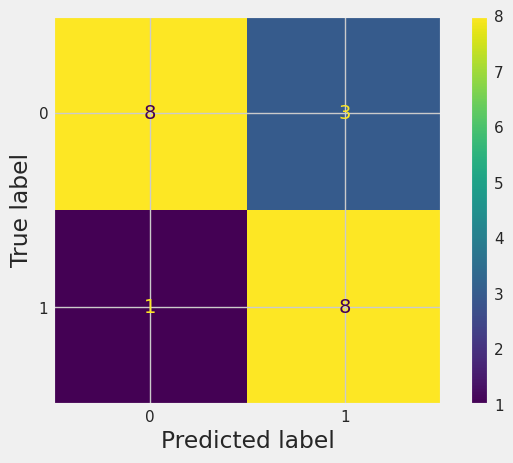

In [ ]:
cfm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cfm,
                               display_labels = model_rna.classes_)
disp.plot()

In [ ]:
importances = model_rf.feature_importances_
importances


array([0.04415151, 0.03786599, 0.05130464, 0.06222705, 0.01530756,
       0.05910071, 0.02410207, 0.0548375 , 0.03812028, 0.05113745,
       0.04416359, 0.08077454, 0.05339908, 0.06339614, 0.03368521,
       0.06294808, 0.05048928, 0.05810341, 0.05398991, 0.06089598])

In [ ]:
data = year_feature.drop('Gender', axis=1)
data.columns

Index(['Favorite Color_Cool', 'Favorite Color_Neutral', 'Favorite Color_Warm',
       'Favorite Music Genre_Electronic',
       'Favorite Music Genre_Folk/Traditional', 'Favorite Music Genre_Hip hop',
       'Favorite Music Genre_Jazz/Blues', 'Favorite Music Genre_Pop',
       'Favorite Music Genre_R&B and soul', 'Favorite Music Genre_Rock',
       'Favorite Beverage_Beer', 'Favorite Beverage_Doesn't drink',
       'Favorite Beverage_Other', 'Favorite Beverage_Vodka',
       'Favorite Beverage_Whiskey', 'Favorite Beverage_Wine',
       'Favorite Soft Drink_7UP/Sprite', 'Favorite Soft Drink_Coca Cola/Pepsi',
       'Favorite Soft Drink_Fanta', 'Favorite Soft Drink_Other'],
      dtype='object')

In [ ]:
# Imprime a importância de cada atributo
for i, feature_name in enumerate(data.columns):
    print(f"{feature_name}: {importances[i]}")

Favorite Color_Cool: 0.0441515107270504
Favorite Color_Neutral: 0.037865990661904374
Favorite Color_Warm: 0.05130464343417932
Favorite Music Genre_Electronic: 0.06222705385693116
Favorite Music Genre_Folk/Traditional: 0.015307557320841072
Favorite Music Genre_Hip hop: 0.059100709531967895
Favorite Music Genre_Jazz/Blues: 0.024102074697015023
Favorite Music Genre_Pop: 0.05483750429713183
Favorite Music Genre_R&B and soul: 0.03812027671333751
Favorite Music Genre_Rock: 0.051137448327807686
Favorite Beverage_Beer: 0.044163588597795796
Favorite Beverage_Doesn't drink: 0.080774542866215
Favorite Beverage_Other: 0.053399076274211026
Favorite Beverage_Vodka: 0.06339614494830789
Favorite Beverage_Whiskey: 0.03368521096410284
Favorite Beverage_Wine: 0.06294808109751536
Favorite Soft Drink_7UP/Sprite: 0.050489280214699984
Favorite Soft Drink_Coca Cola/Pepsi: 0.0581034096580816
Favorite Soft Drink_Fanta: 0.05398991094933336
Favorite Soft Drink_Other: 0.06089598486157086
